In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dataset = pd.read_csv("/Users/vashuagarwal/Downloads/BENNETT_things/3rd_sem_bennett/CSET_211_SML/lab/lab8/car_evaluation.csv")

In [19]:
print(dataset.shape)
print(dataset.head(5))

(1728, 7)
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [20]:
from sklearn.preprocessing import LabelEncoder
dataset['buying'] = LabelEncoder().fit_transform(dataset['buying'])
dataset['maint'] = LabelEncoder().fit_transform(dataset['maint'])
dataset['doors'] = LabelEncoder().fit_transform(dataset['doors'])
dataset['persons'] = LabelEncoder().fit_transform(dataset['persons'])
dataset['lug_boot'] = LabelEncoder().fit_transform(dataset['lug_boot'])
dataset['safety'] = LabelEncoder().fit_transform(dataset['safety'])
dataset['class'] = LabelEncoder().fit_transform(dataset['class'])
dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [21]:
x =dataset.iloc[:,:-1].values
y =dataset.iloc[:,-1].values

In [22]:
print(x)
print(y)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]
[2 2 2 ... 2 1 3]


In [23]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size =0.2,random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(criterion = 'entropy',random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
print(y_pred)

[2 2 2 2 2 1 2 0 1 2 2 2 0 2 2 0 2 2 0 2 1 0 1 2 2 2 2 2 2 2 1 0 2 0 1 2 2
 2 2 2 2 2 2 2 3 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 2 0 0 0
 1 0 2 2 0 2 0 0 0 2 2 2 2 1 2 2 2 0 2 2 2 3 2 0 0 2 2 2 0 2 3 0 2 0 2 2 2
 2 2 0 2 1 0 2 2 2 2 2 0 2 2 2 2 0 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2
 1 0 0 0 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 0 2 0
 2 1 2 2 2 2 0 2 2 2 0 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0
 2 3 2 2 2 3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 0 1 0 0 2 2
 2 0 2 2 0 2 2 3 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 0 2 3 1 2 2 2 2 2 2 2
 2 2 2 0 2 0 0 1 1 2 0 2 0 2 1 0 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 2 1
 2 1 2 2 2 3 2 2 3 2 0 2 0]


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [29]:
print(cm)

[[ 72   5   2   0]
 [  0  17   0   0]
 [  0   0 240   0]
 [  1   0   0   9]]


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model 97.6878612716763%


In [31]:
from sklearn.metrics import classification_report
cm1 = classification_report(y_test, y_pred)
print(cm1)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        79
           1       0.77      1.00      0.87        17
           2       0.99      1.00      1.00       240
           3       1.00      0.90      0.95        10

    accuracy                           0.98       346
   macro avg       0.94      0.95      0.94       346
weighted avg       0.98      0.98      0.98       346



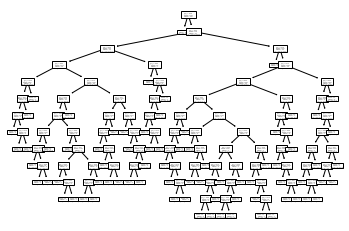

In [47]:

from sklearn import tree
tree.plot_tree(classifier)
plt.show()